In [8]:
# DS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import mplcyberpunk
plt.style.use('cyberpunk')

# PLOTLY
import plotly.offline as po
import plotly.graph_objs as go

# SKLEARN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score, plot_roc_curve, log_loss
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Modules
from src.data_clean import *
from src.helpers import *

# GLOBAL VARS
FSIZE = (12, 8)

In [5]:
# Original Data
original = data_cleaner(pd.read_csv("data/churn_train.csv"))
# Create X, y arrays from dataframe
X_pre = original
y_pre = original.pop("target")


In [6]:
churn = data_cleaner(pd.read_csv("data/churn_train.csv"))

In [7]:
# Create X, y arrays from dataframe
X = churn
y = churn.pop("target")


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)    

In [13]:
#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state = 50, max_iter=200)

In [14]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#Predict the value for new, unseen data
pred = logmodel.predict(X_test)


In [17]:
log_loss(y_test, pred)

9.842609438666091

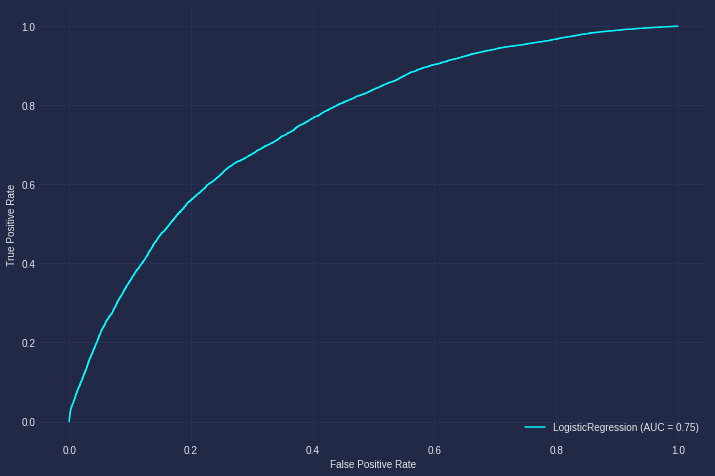

In [19]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=FSIZE)
plot_roc_curve(logmodel, X_train, y_train, ax=ax)

The **odds ratio** is the ratio of the of the probability of the positive to the negative case, i.e., 

$$OR = \frac{P(y=1)}{1-P(y=1)}$$

The logistic function takes the log odds of something and returns the probability.

In [65]:
logmodel.coef_.reshape(10,)

array([ 0.02922442,  0.17615038,  0.09362134, -0.03939987, -0.10705054,
       -0.90566244, -0.00143664,  0.74789915, -1.04025473,  0.17355884])

In [51]:
np.concatenate([np.array(X.columns), logmodel.coef_.reshape(10,)])

array(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user',
       'weekday_pct', 'city_Astapor', "city_King's Landing",
       'city_Winterfell', 0.029224416856357356, 0.17615038386273227,
       0.09362134232638056, -0.03939987470134641, -0.10705053585804569,
       -0.905662438594761, -0.0014366429703468323, 0.747899147308533,
       -1.040254733404036, 0.17355883667426092], dtype=object)

In [64]:
np.array(X.columns).shape

(10,)

In [81]:
arr = dict(zip(np.array(X.columns), logmodel.coef_.reshape(10,)))
arr

{'avg_dist': 0.029224416856357356,
 'avg_rating_by_driver': 0.17615038386273227,
 'avg_rating_of_driver': 0.09362134232638056,
 'surge_pct': -0.03939987470134641,
 'trips_in_first_30_days': -0.10705053585804569,
 'luxury_car_user': -0.905662438594761,
 'weekday_pct': -0.0014366429703468323,
 'city_Astapor': 0.747899147308533,
 "city_King's Landing": -1.040254733404036,
 'city_Winterfell': 0.17355883667426092}

In [73]:
df = pd.DataFrame(data = logmodel.coef_, columns = [np.array(X.columns)])

In [85]:
logmodel.coef_.reshape(10,)

array([ 0.02922442,  0.17615038,  0.09362134, -0.03939987, -0.10705054,
       -0.90566244, -0.00143664,  0.74789915, -1.04025473,  0.17355884])

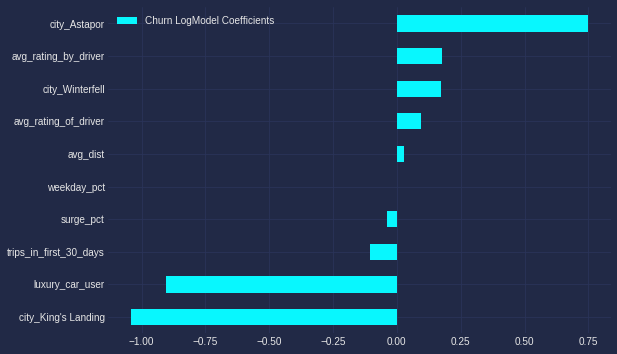

In [101]:
# Feature Importances
#fig, ax = plt.subplots(figsize=(20,20))
# See and plot feature importances 
feat_scores = pd.DataFrame({'Churn LogModel Coefficients' : logmodel.coef_.reshape(10,)},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn LogModel Coefficients')
feat_scores.plot(kind='barh', figsize=(9, 6))

In [ ]:
https://wiki.lesswrong.com/wiki/Odds

In [106]:
y_probs=logmodel.predict_proba(X_test) 
#   probs_y is a 2-D array of probability of being labeled as 0 (first 
#   column of 
#   array) vs 1 (2nd column in array)

In [107]:
y_probs

array([[0.6664037 , 0.3335963 ],
       [0.17018038, 0.82981962],
       [0.33128742, 0.66871258],
       ...,
       [0.21919138, 0.78080862],
       [0.17256842, 0.82743158],
       [0.46852471, 0.53147529]])

In [110]:
from sklearn.metrics import precision_recall_curve, auc

In [108]:
#retrieve probability of being 1(in second column of probs_y)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1]) 

In [111]:
pr_auc = auc(recall, precision)

(0, 1)

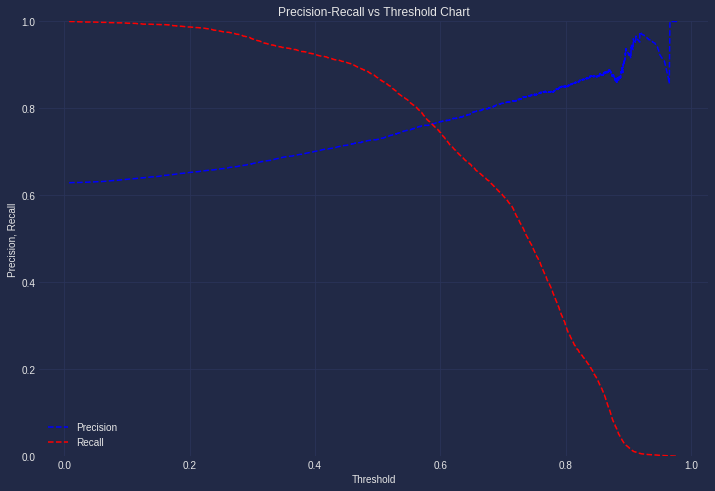

In [114]:
fig, ax = plt.subplots(figsize=FSIZE)
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [115]:
# src: https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

In [116]:
from sklearn.linear_model import LogisticRegressionCV

In [131]:
logmodelCV = LogisticRegressionCV(cv=5, random_state = 50, max_iter=200)

In [132]:
logmodelCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=200, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=50, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [133]:
predCV = logmodel.predict(X_test)


In [134]:
log_loss(y_test, predCV)

9.842609438666091

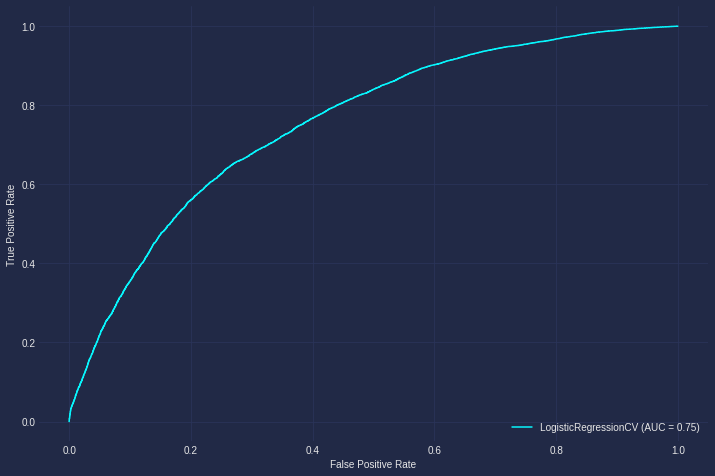

In [135]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=FSIZE)
plot_roc_curve(logmodelCV, X_train, y_train, ax=ax)

In [142]:
logmodelCV.coef_ 

array([[ 0.02893326,  0.16780918,  0.08855723, -0.03928192, -0.10694892,
        -0.884877  , -0.00144321,  0.72826085, -1.02081463,  0.16565133]])

In [143]:
# the coefs are now different
logmodel.coef_

array([[ 0.02922442,  0.17615038,  0.09362134, -0.03939987, -0.10705054,
        -0.90566244, -0.00143664,  0.74789915, -1.04025473,  0.17355884]])

In [158]:
logmodelCV.predict_log_proba(X_test)

array([[-0.40586019, -1.09782259],
       [-1.75332789, -0.19018834],
       [-1.09673562, -0.40640476],
       ...,
       [-1.51325506, -0.24870764],
       [-1.7436792 , -0.19222137],
       [-0.75228357, -0.6373135 ]])

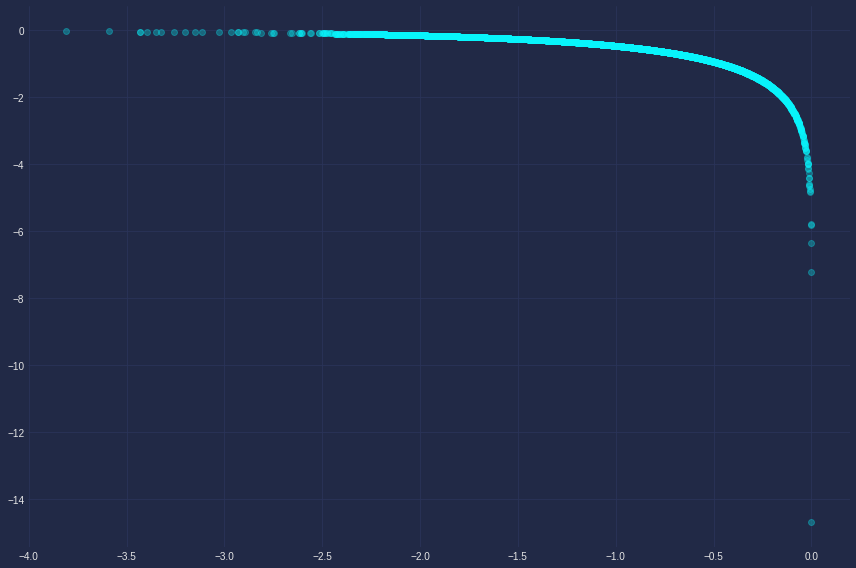

In [160]:
fig, ax = plt.subplots(figsize=FSIZE)

plt.scatter(logmodelCV.predict_log_proba(X_test)[:, 0], logmodelCV.predict_log_proba(X_test)[:, 1], alpha=.3)
plt.tight_layout()

#idk what this is showing, looks cool tho !

In [164]:
all_data_lr = LogisticRegressionCV(random_state = 50, max_iter=300)
all_data_lr.fit(X_pre, y_pre)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=300, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=50, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [165]:
all_data_lr.coef_

array([[ 0.0303052 ,  0.16658651,  0.08192304, -0.03851558, -0.10550194,
        -0.87818026, -0.00128561,  0.74505529, -0.99216234,  0.18270476]])

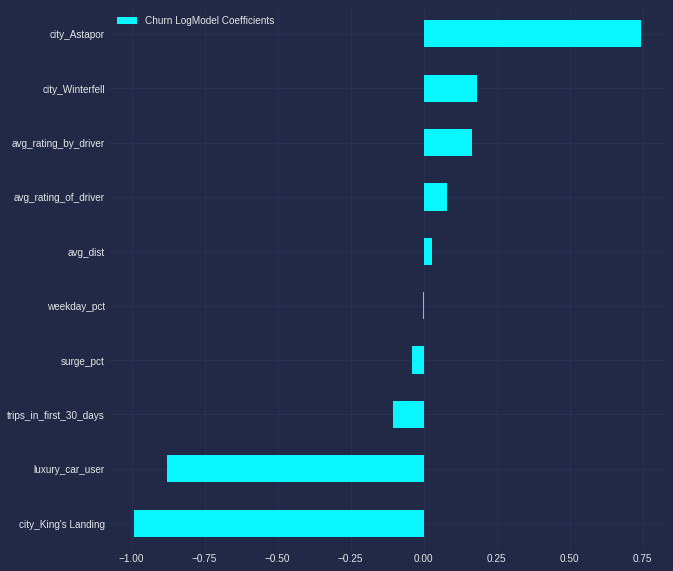

In [171]:
# Feature Importances
#fig, ax = plt.subplots(figsize=(20,20))
# See and plot feature coefficients
feat_scores = pd.DataFrame({'Churn LogModel Coefficients' : all_data_lr.coef_.reshape(10,)},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn LogModel Coefficients')
feat_scores.plot(kind='barh', figsize=(10, 10))

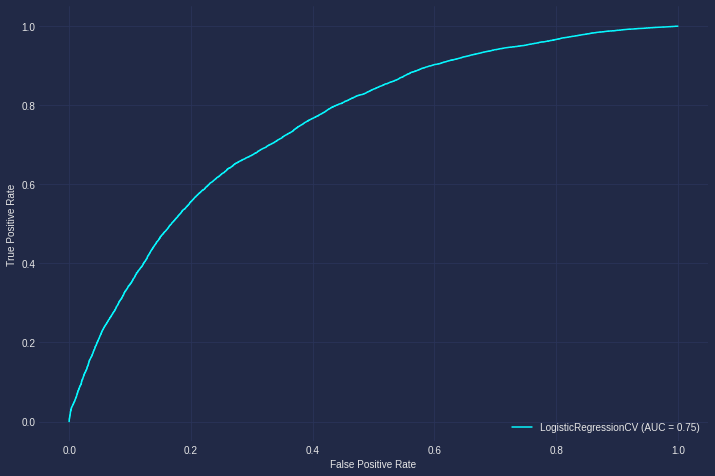

In [172]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=FSIZE)
plot_roc_curve(all_data_lr, X, y, ax=ax)

In [173]:
for name, coef in zip(df.columns[1:], all_data_lr.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

('avg_rating_by_driver',): 0.0303
('avg_rating_of_driver',): 0.1666
('surge_pct',): 0.0819
('trips_in_first_30_days',): -0.0385
('luxury_car_user',): -0.1055
('weekday_pct',): -0.8782
('city_Astapor',): -0.0013
("city_King's Landing",): 0.7451
('city_Winterfell',): -0.9922


In [174]:
for i, coef in enumerate(all_data_lr.coef_[0]):
    print("beta{0}: {1:0.5f}".format(i + 1, np.exp(coef)))

beta1: 1.03077
beta2: 1.18127
beta3: 1.08537
beta4: 0.96222
beta5: 0.89987
beta6: 0.41554
beta7: 0.99872
beta8: 2.10656
beta9: 0.37077
beta10: 1.20046


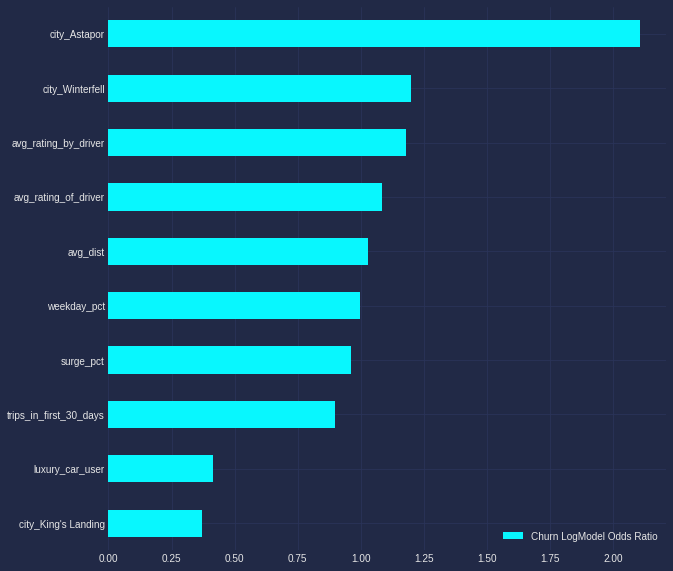

In [179]:
feat_scores = pd.DataFrame({'Churn LogModel Odds Ratio' : np.exp(all_data_lr.coef_.reshape(10,))},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn LogModel Odds Ratio')
feat_scores.plot(kind='barh', figsize=(10, 10))

In [181]:
# What change is required to cut in half chances of churn
for i, coef in enumerate(all_data_lr.coef_[0]):
    print("beta{0}: {1:0.5f}".format(i + 1, np.log(.5) / coef))

beta1: -22.87222
beta2: -4.16088
beta3: -8.46096
beta4: 17.99654
beta5: 6.56999
beta6: 0.78930
beta7: 539.15966
beta8: -0.93033
beta9: 0.69862
beta10: -3.79381


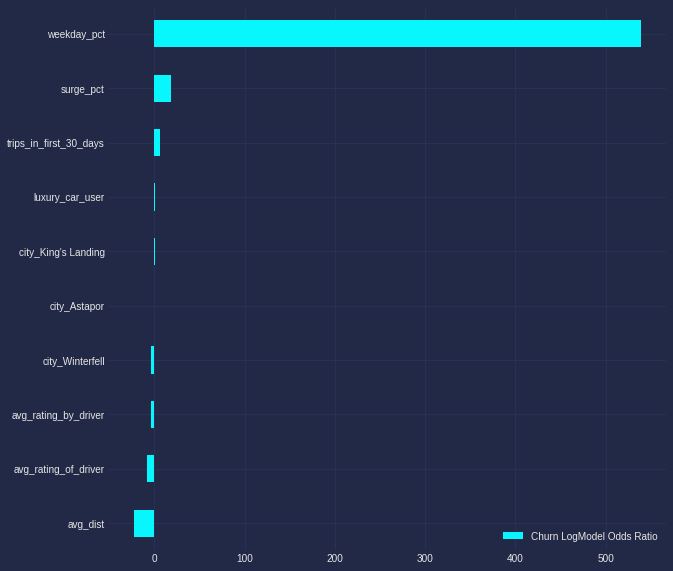

In [183]:
feat_scores = pd.DataFrame({'Churn LogModel Odds Ratio' : np.log(.5) / all_data_lr.coef_.reshape(10,)},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn LogModel Odds Ratio')
feat_scores.plot(kind='barh', figsize=(10, 10))